# Resume Classifier

By Karan Thakur

In [1]:
#importing libraries
import os
import re
import nltk
import spacy
import string
import textract
import pandas as pd
import seaborn as sns
from matplotlib import pylab
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [2]:
#viewing all the categories
os.listdir('Dataset/Resumes')

['React JS Developer', 'DS', 'PeopleSoft', 'SDE Resume']

In [3]:
# try to extract all folder one time
file_name = []
category = []
base_dir = './Resume_Docx'
for root, dirs, files in os.walk(base_dir, topdown=False):
    for name in files:
        if name.endswith(".docx"):
            file_path = os.path.join(root, name)
            file_name.append(file_path)

In [4]:
file_path1 = []
category1  = []
directory1 = 'Dataset/Resumes/PeopleSoft'
for i in os.listdir(directory1):
    if i.endswith('.docx'):
        os.path.join(directory1, i)
        file_path1.append((textract.process(os.path.join(directory1, i))).decode('utf-8'))
        category1.append('PeopleSoft')

In [5]:
data1 = pd.DataFrame(data = file_path1 , columns = ['Raw_Details'])
data1['Category1'] = category1
data1

,Raw_Details,Category1
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft
5,"SIRAZUDDIN M\n\n\tBangalore, INDIA\t\n\n\n\n\n...",PeopleSoft
6,PeopleSoft Administration\n\n \n\nVivekanand S...,PeopleSoft
7,Priyabrata Hota\n\n\n\n\n\nCAREER OBJECTIVE\t\...,PeopleSoft
8,Hari Narayana \t\t \n\n\t\n\n\n\n...,PeopleSoft
9,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,PeopleSoft


In [6]:
file_path2 = []
category2  = []
directory2 = 'Dataset/Resumes/React JS Developer'
for i in os.listdir(directory2):
    if i.endswith('.docx'):
        os.path.join(directory2, i)
        file_path2.append((textract.process(os.path.join(directory2, i))).decode('utf-8'))
        category2.append('React JS Developer')

In [7]:
data2 = pd.DataFrame(data = file_path2 , columns = ['Raw_Details'])
data2['Category2'] = category2
data2

,Raw_Details,Category2
0,MD KHIZARUDDIN RAUF \n\n \t EXPERIENCE \n\n ...,React JS Developer
1,"SARALA MADASU\n\nSARALA MADASU\n\n 204,Sri ge...",React JS Developer
2,PRAGNYA PATTNAIK\n\n \n\n \n\n \n\n Expertise:...,React JS Developer
3,Ranga Gaganam \n\n\n\n \n\nProfessional\n\n \...,React JS Developer
4,Thirupathamma Balla\n\n\n\nSUMMARY:\n\n\n\n2.8...,React JS Developer
5,MAREEDU LOKESH BABU\n\nPROFESSIONAL OVERVIEW\n...,React JS Developer
6,Ui-Developer/ React JS Developer \n\nNAME: KRI...,React JS Developer
7,SUSOVAN BAG \n\nSeeking a challenging po...,React JS Developer
8,Kotani Durga Prasad\n\n\n\n\n\nObjective:\n\n\...,React JS Developer
9,Venkatalakshmi Pedireddy\n\nSoftware Developer...,React JS Developer


In [8]:
file_path3 = []
category3  = []
directory3 = 'Dataset/Resumes/DS'
for i in os.listdir(directory3):
    if i.endswith('.docx'):
        os.path.join(directory3, i)
        file_path3.append((textract.process(os.path.join(directory3, i))).decode('utf-8'))
        category3.append('DS')

In [9]:
data3 = pd.DataFrame(data = file_path3 , columns = ['Raw_Details'])
data3['Category3'] = category3
data3

,Raw_Details,Category3
0,Jan 2020 -\n\n\n\nMar 2020\n\n\n\n\n\n\n\n\n\n...,DS
1,MARKUS MUND\n\nmarkusmlm35@gmail.com ▪ (208) 7...,DS
2,Sankeerth Ankam\n\nsankeerth.ankam@gmail.com\n...,DS
3,"New York, NY\n\n\n\n(914) 707-3191\n\n\n\n\n\n...",DS
4,RESUME\n\nName\n\nE.Mallikarjun Yadav\n\nEmail...,DS
5,suhas.patil@utdallas.edu\n\n\n\n+1 469-380-425...,DS
6,GBEMISOLA BUSARI\n\nData Scientist\n\n\n\n\n\n...,DS
7,Srikanth Shenoy\n\n\n\nsrikanth.shenoy.officia...,DS
8,"MUKILA BROWN\n\n \n\n \n\n\n\nBartow, FL |\n\...",DS
9,NOTA REALPERSON\n\n\n\nData analysis and visua...,DS


In [10]:
file_path4 = []
category4  = []
directory4 = 'Dataset/Resumes/SDE Resume'
for i in os.listdir(directory4):
    if i.endswith('.docx'):
        os.path.join(directory4, i)
        file_path4.append((textract.process(os.path.join(directory4, i))).decode('utf-8'))
        category4.append('SDE Resume')

In [11]:
data4 = pd.DataFrame(data = file_path4 , columns = ['Raw_Details'])
data4['Category4'] = category4
data4

,Raw_Details,Category4
0,Sourabh Bajaj\n\nEmail: sourabh@sourabhbajaj.c...,SDE Resume
1,Mani Mozaffar Python Backend Engineer\n\n\n\n\...,SDE Resume
2,Ankush Rawat\n\nEmail: ankush.rawat102001@gma...,SDE Resume
3,Faiyazthulla Shaik\n\nfaiyaz@pdx.edu\n\n\n\n18...,SDE Resume
4,"Liam Zheng\n\nMinneapolis, MN 55414 || liamzly...",SDE Resume
5,Sukanya Madbhavi\n\n\n\nComputer Engineer\n\n\...,SDE Resume
6,"Daniel Phang\n\n\n\n\n\nSeattle, Washington\n\...",SDE Resume
7,"EDUCATION\n\nNortheastern University, Boston, ...",SDE Resume
8,"Yiyang Liu\n\n\n\n3650 McClintock Ave, Los Ang...",SDE Resume
9,XIAOMOU HOU\n\n\n\n+81 070-2039-0069 ⋄ houxiao...,SDE Resume


In [12]:
#combining the dataframe
resume_data = pd.concat([data1, data2, data3, data4], ignore_index = True)
resume_data

,Raw_Details,Category1,Category2,Category3,Category4
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN
...,...,...,...,...,...
65,Srinivas Koushik Kondubhatla\n\nEmail : sriniv...,NaN,NaN,NaN,SDE Resume
66,RIPUL AGRAWAL\n\n\n\nSOFTWARE DEVELOPER\n\n\n\...,NaN,NaN,NaN,SDE Resume
67,Sandeep Reddy Somu\n\n\n\n\n\n+1 (602) - 481-7...,NaN,NaN,NaN,SDE Resume
68,Aditya Maskar Last Updated on 17th October 20...,NaN,NaN,NaN,SDE Resume


In [13]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Raw_Details  70 non-null     object
 1   Category1    10 non-null     object
 2   Category2    20 non-null     object
 3   Category3    23 non-null     object
 4   Category4    17 non-null     object
dtypes: object(5)
memory usage: 2.9+ KB


In [14]:
resume_data['Category'] = category1 + category2 + category3 + category4
resume_data

,Raw_Details,Category1,Category2,Category3,Category4,Category
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
1,Classification: Internal\n\nClassification: In...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,PeopleSoft,NaN,NaN,NaN,PeopleSoft
...,...,...,...,...,...,...
65,Srinivas Koushik Kondubhatla\n\nEmail : sriniv...,NaN,NaN,NaN,SDE Resume,SDE Resume
66,RIPUL AGRAWAL\n\n\n\nSOFTWARE DEVELOPER\n\n\n\...,NaN,NaN,NaN,SDE Resume,SDE Resume
67,Sandeep Reddy Somu\n\n\n\n\n\n+1 (602) - 481-7...,NaN,NaN,NaN,SDE Resume,SDE Resume
68,Aditya Maskar Last Updated on 17th October 20...,NaN,NaN,NaN,SDE Resume,SDE Resume


In [15]:
resume_data.drop(['Category1', 'Category2', 'Category3', 'Category4'], axis = 1, inplace = True)
resume_data = resume_data[["Category", "Raw_Details"]]
resume_data

,Category,Raw_Details
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...
1,PeopleSoft,Classification: Internal\n\nClassification: In...
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...
3,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...
...,...,...
65,SDE Resume,Srinivas Koushik Kondubhatla\n\nEmail : sriniv...
66,SDE Resume,RIPUL AGRAWAL\n\n\n\nSOFTWARE DEVELOPER\n\n\n\...
67,SDE Resume,Sandeep Reddy Somu\n\n\n\n\n\n+1 (602) - 481-7...
68,SDE Resume,Aditya Maskar Last Updated on 17th October 20...


In [16]:
#saving the csv file
resume_data.to_csv('Dataset/Raw_Resume.csv', index = False)

In [17]:
resume_data[resume_data.Category == 'SDE Resume']

,Category,Raw_Details
53,SDE Resume,Sourabh Bajaj\n\nEmail: sourabh@sourabhbajaj.c...
54,SDE Resume,Mani Mozaffar Python Backend Engineer\n\n\n\n\...
55,SDE Resume,Ankush Rawat\n\nEmail: ankush.rawat102001@gma...
56,SDE Resume,Faiyazthulla Shaik\n\nfaiyaz@pdx.edu\n\n\n\n18...
57,SDE Resume,"Liam Zheng\n\nMinneapolis, MN 55414 || liamzly..."
58,SDE Resume,Sukanya Madbhavi\n\n\n\nComputer Engineer\n\n\...
59,SDE Resume,"Daniel Phang\n\n\n\n\n\nSeattle, Washington\n\..."
60,SDE Resume,"EDUCATION\n\nNortheastern University, Boston, ..."
61,SDE Resume,"Yiyang Liu\n\n\n\n3650 McClintock Ave, Los Ang..."
62,SDE Resume,XIAOMOU HOU\n\n\n\n+81 070-2039-0069 ⋄ houxiao...


In [18]:
resume_data.isnull().sum()

Category       0
Raw_Details    0
dtype: int64

In [19]:
#calculating the words in each resume
resume_data['Word_Count'] = resume_data['Raw_Details'].apply(lambda x: len(str(x).split(' ')))
resume_data[['Raw_Details','Word_Count']].head()

,Raw_Details,Word_Count
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363
1,Classification: Internal\n\nClassification: In...,558
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918


Text(0.5, 1.0, 'Resume Word Count Distribution')

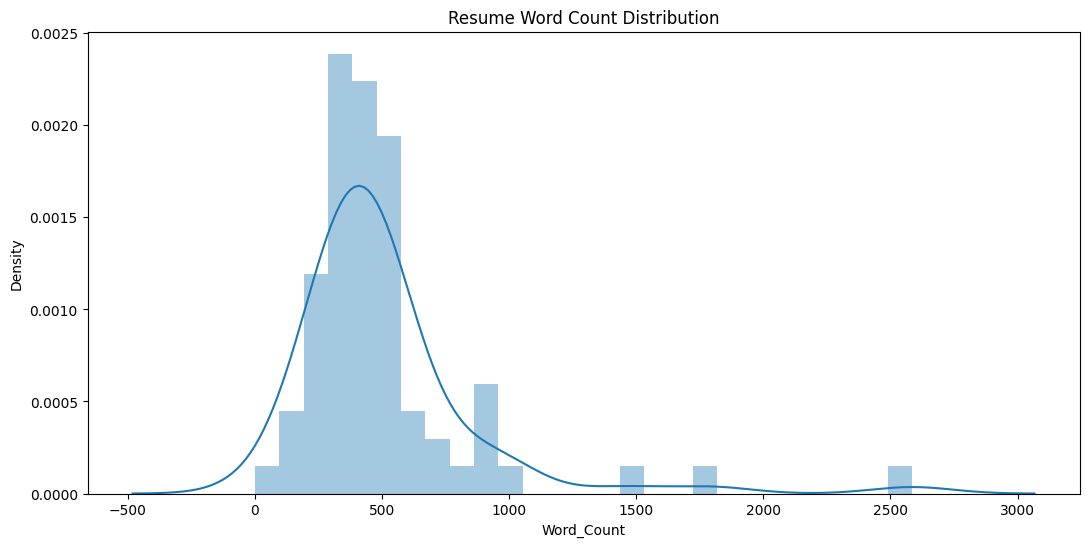

In [20]:
plt.figure(figsize=(12.8,6))
sns.distplot(resume_data['Word_Count']).set_title('Resume Word Count Distribution')

In [21]:
resume_data['Char_Count'] = resume_data['Raw_Details'].str.len() ## this also includes spaces
resume_data[['Raw_Details','Char_Count']].head()

,Raw_Details,Char_Count
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,2852
1,Classification: Internal\n\nClassification: In...,4917
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,8010
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,2150
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,7943


Text(0.5, 1.0, 'Resume Character Count Distribution')

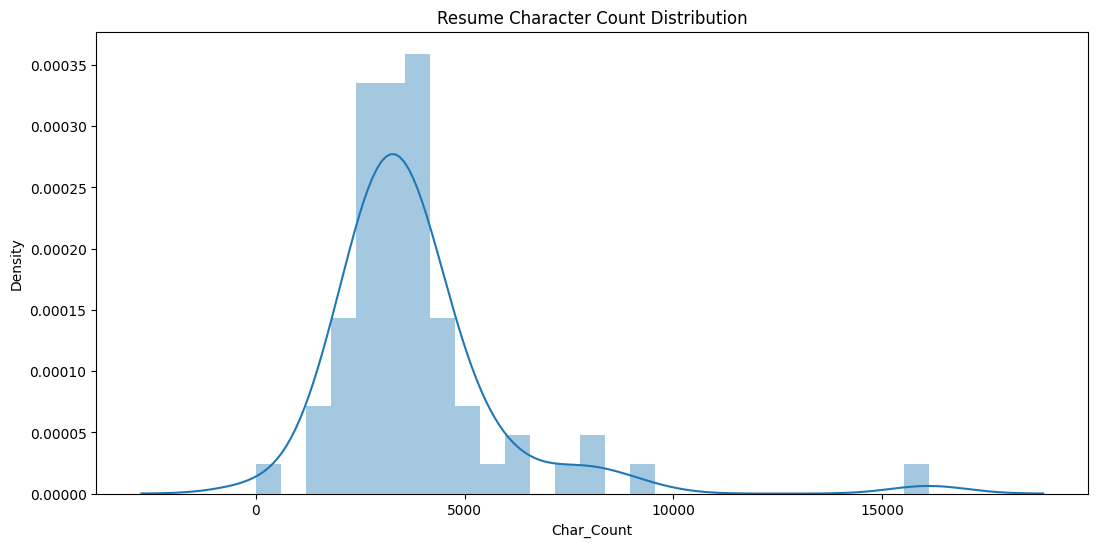

In [22]:
plt.figure(figsize=(12.8,6))
sns.distplot(resume_data['Char_Count']).set_title('Resume Character Count Distribution')

In [23]:
#number of stopwords
stop = stopwords.words('english')
resume_data['Stopwords'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x in stop]))
resume_data[['Raw_Details', 'Stopwords']].head()

,Raw_Details,Stopwords
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,98
1,Classification: Internal\n\nClassification: In...,114
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,190
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,42
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,225


In [24]:
resume_data['Numerics'] = resume_data['Raw_Details'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
resume_data[['Raw_Details', 'Numerics']].head()

,Raw_Details,Numerics
0,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,4
1,Classification: Internal\n\nClassification: In...,7
2,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,4
3,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,8
4,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,4


In [25]:
resume_data

,Category,Raw_Details,Word_Count,Char_Count,Stopwords,Numerics
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,363,2852,98,4
1,PeopleSoft,Classification: Internal\n\nClassification: In...,558,4917,114,7
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,1023,8010,190,4
3,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,356,2150,42,8
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,918,7943,225,4
...,...,...,...,...,...,...
65,SDE Resume,Srinivas Koushik Kondubhatla\n\nEmail : sriniv...,285,2667,57,14
66,SDE Resume,RIPUL AGRAWAL\n\n\n\nSOFTWARE DEVELOPER\n\n\n\...,267,2492,48,5
67,SDE Resume,Sandeep Reddy Somu\n\n\n\n\n\n+1 (602) - 481-7...,575,4438,150,16
68,SDE Resume,Aditya Maskar Last Updated on 17th October 20...,398,3525,66,12


In [26]:
#text preprocessing
def preprocess(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url = re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]

    return " ".join(filtered_words)

In [27]:
resume_data = pd.read_csv('Dataset/Raw_Resume.csv')
resume_data['Resume_Details'] = resume_data.Raw_Details.apply(lambda x: preprocess(x))
resume_data

,Category,Raw_Details,Resume_Details
0,PeopleSoft,Tanna Sujatha \n\n\n\n\n\n\n\nOBJECTIVE\n\nSee...,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,Classification: Internal\n\nClassification: In...,classification internal classification interna...
2,PeopleSoft,Anubhav Kumar Singh\t\t\n\n\n\nCore Competenci...,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,C O N T A C T :\n\n\n\nAddress: Manyata Tech P...,address manyata tech park nagavara bangalore l...
4,PeopleSoft,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,peoplesoft admin varkala vikas career objectiv...
...,...,...,...
65,SDE Resume,Srinivas Koushik Kondubhatla\n\nEmail : sriniv...,srinivas koushik kondubhatla email srinivas ko...
66,SDE Resume,RIPUL AGRAWAL\n\n\n\nSOFTWARE DEVELOPER\n\n\n\...,ripul agrawal software developer personal deta...
67,SDE Resume,Sandeep Reddy Somu\n\n\n\n\n\n+1 (602) - 481-7...,sandeep reddy somu ssomu asu edu linkedin com ...
68,SDE Resume,Aditya Maskar Last Updated on 17th October 20...,aditya maskar last updated october lighttoinfi...


In [28]:
#saved the clean resume in a new file
resume_data.drop(['Raw_Details'], axis = 1, inplace = True)
resume_data

,Category,Resume_Details
0,PeopleSoft,tanna sujatha objective seeking challenging ro...
1,PeopleSoft,classification internal classification interna...
2,PeopleSoft,anubhav kumar singh core competencies scriptin...
3,PeopleSoft,address manyata tech park nagavara bangalore l...
4,PeopleSoft,peoplesoft admin varkala vikas career objectiv...
...,...,...
65,SDE Resume,srinivas koushik kondubhatla email srinivas ko...
66,SDE Resume,ripul agrawal software developer personal deta...
67,SDE Resume,sandeep reddy somu ssomu asu edu linkedin com ...
68,SDE Resume,aditya maskar last updated october lighttoinfi...


In [29]:
resume_data.to_csv('Dataset/Cleaned_Resumes.csv', index = False)

In [30]:
resume_data.Resume_Details[10]

'khizaruddin rauf experience currently working pickupbiz solution private limited pune january till date months working intern react software developer sound experience exposure development using react bootstrap html css react hooks redux etc ability work given environment demonstrated good communication analytical skills team building skills emphasizing versatility adaptability dedication drive hard working individual ability manage multiple tasks pressured environment application development designing coordinated development team discuss user interface ideas applications reviewed application requirements interface designs ensure compatibility existing applications components designing application interface coding identified web based user interactions developed highly responsive user interface components via react concepts translated designs wireframes high quality code wrote application interface via javascript following react workflows code debugging front end architecture troubles

In [31]:
#implementing NER
oneSetOfStopWords = set(stopwords.words('english')+['``', "''"])
totalWords =[]
Sentences = resume_data['Resume_Details'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = preprocess(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('data', 392), ('using', 227), ('experience', 221), ('application', 214), ('react', 165), ('web', 160), ('peoplesoft', 157), ('project', 153), ('skills', 135), ('server', 112), ('python', 111), ('learning', 109), ('html', 109), ('science', 104), ('tools', 102), ('university', 100), ('analysis', 99), ('css', 95), ('system', 94), ('software', 90), ('management', 90), ('knowledge', 88), ('servers', 88), ('development', 87), ('used', 85), ('javascript', 84), ('github', 78), ('projects', 76), ('engineering', 75), ('sql', 74), ('developer', 74), ('database', 73), ('people', 72), ('machine', 72), ('business', 71), ('user', 71), ('team', 71), ('technical', 71), ('com', 71), ('technology', 70), ('technologies', 69), ('process', 67), ('code', 67), ('various', 63), ('applications', 63), ('developed', 62), ('like', 61), ('education', 61), ('work', 60), ('analytics', 60)]


In [32]:
#implementing POS tagging
nlp = spacy.load('en_core_web_lg')

one_block = cleanedSentences[1300:5200]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style = 'ent', jupyter = True)

In [33]:
for token in doc_block[:30]:
    print(token,token.pos_)  

  SPACE
client NOUN
datum PROPN
role NOUN
system NOUN
engineer NOUN
duration NOUN
jul PROPN
present PROPN
team NOUN
size NOUN
members NOUN
description NOUN
maintenance NOUN
production NOUN
batch NOUN
support NOUN
project NOUN
maintenance NOUN
involves VERB
working VERB
tickets NOUN
needs VERB
customization NOUN
setup NOUN
enhancements NOUN
creating VERB
modifying VERB
peoplesoft ADJ
objects NOUN


In [34]:
#filtering out only the nouns and verbs from the text to tokens
one_block = cleanedSentences
doc_block = nlp(one_block)
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[:250])

['seeking', 'role', 'area', 'work', 'organization', 'utilize', 'knowledge', 'provide', 'solutions', 'business', 'summary', 'expertise', 'finance', 'modules', 'purchase', 'account', 'payables', 'experienced', 'working', 'reporting', 'tools', 'query', 'end', 'end', 'knowledge', 'modules', 'handled', 'change', 'requests', 'user', 'synopsis', 'result', 'oriented', 'years', 'experience', 'extended', 'expertise', 'financials', 'area', 'design', 'maintenance', 'production', 'support', 'understanding', 'technology', 'focus', 'delivering', 'business', 'solutions', 'working', 'system', 'engineer', 'decision', 'making', 'skills', 'approach', 'dedicated', 'achieve', 'goals', 'goals', 'ability', 'build', 'territories', 'expand', 'opportunities', 'achievement', 'stated', 'targets', 'education', 'visakhapatnam', 'percentage', 'visakhapatnam', 'percentage', 'school', 'burja', 'percentage', 'software', 'proficiency', 'purchase', 'account', 'payables', 'vendor', 'management', 'databases', 'reporting', '

In [35]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['Words','Count']
wd_df[0:15]

,Words,Count
0,data,318
1,using,216
2,application,213
3,experience,189
4,react,165
5,web,155
6,project,146
7,skills,126
8,learning,108
9,tools,101


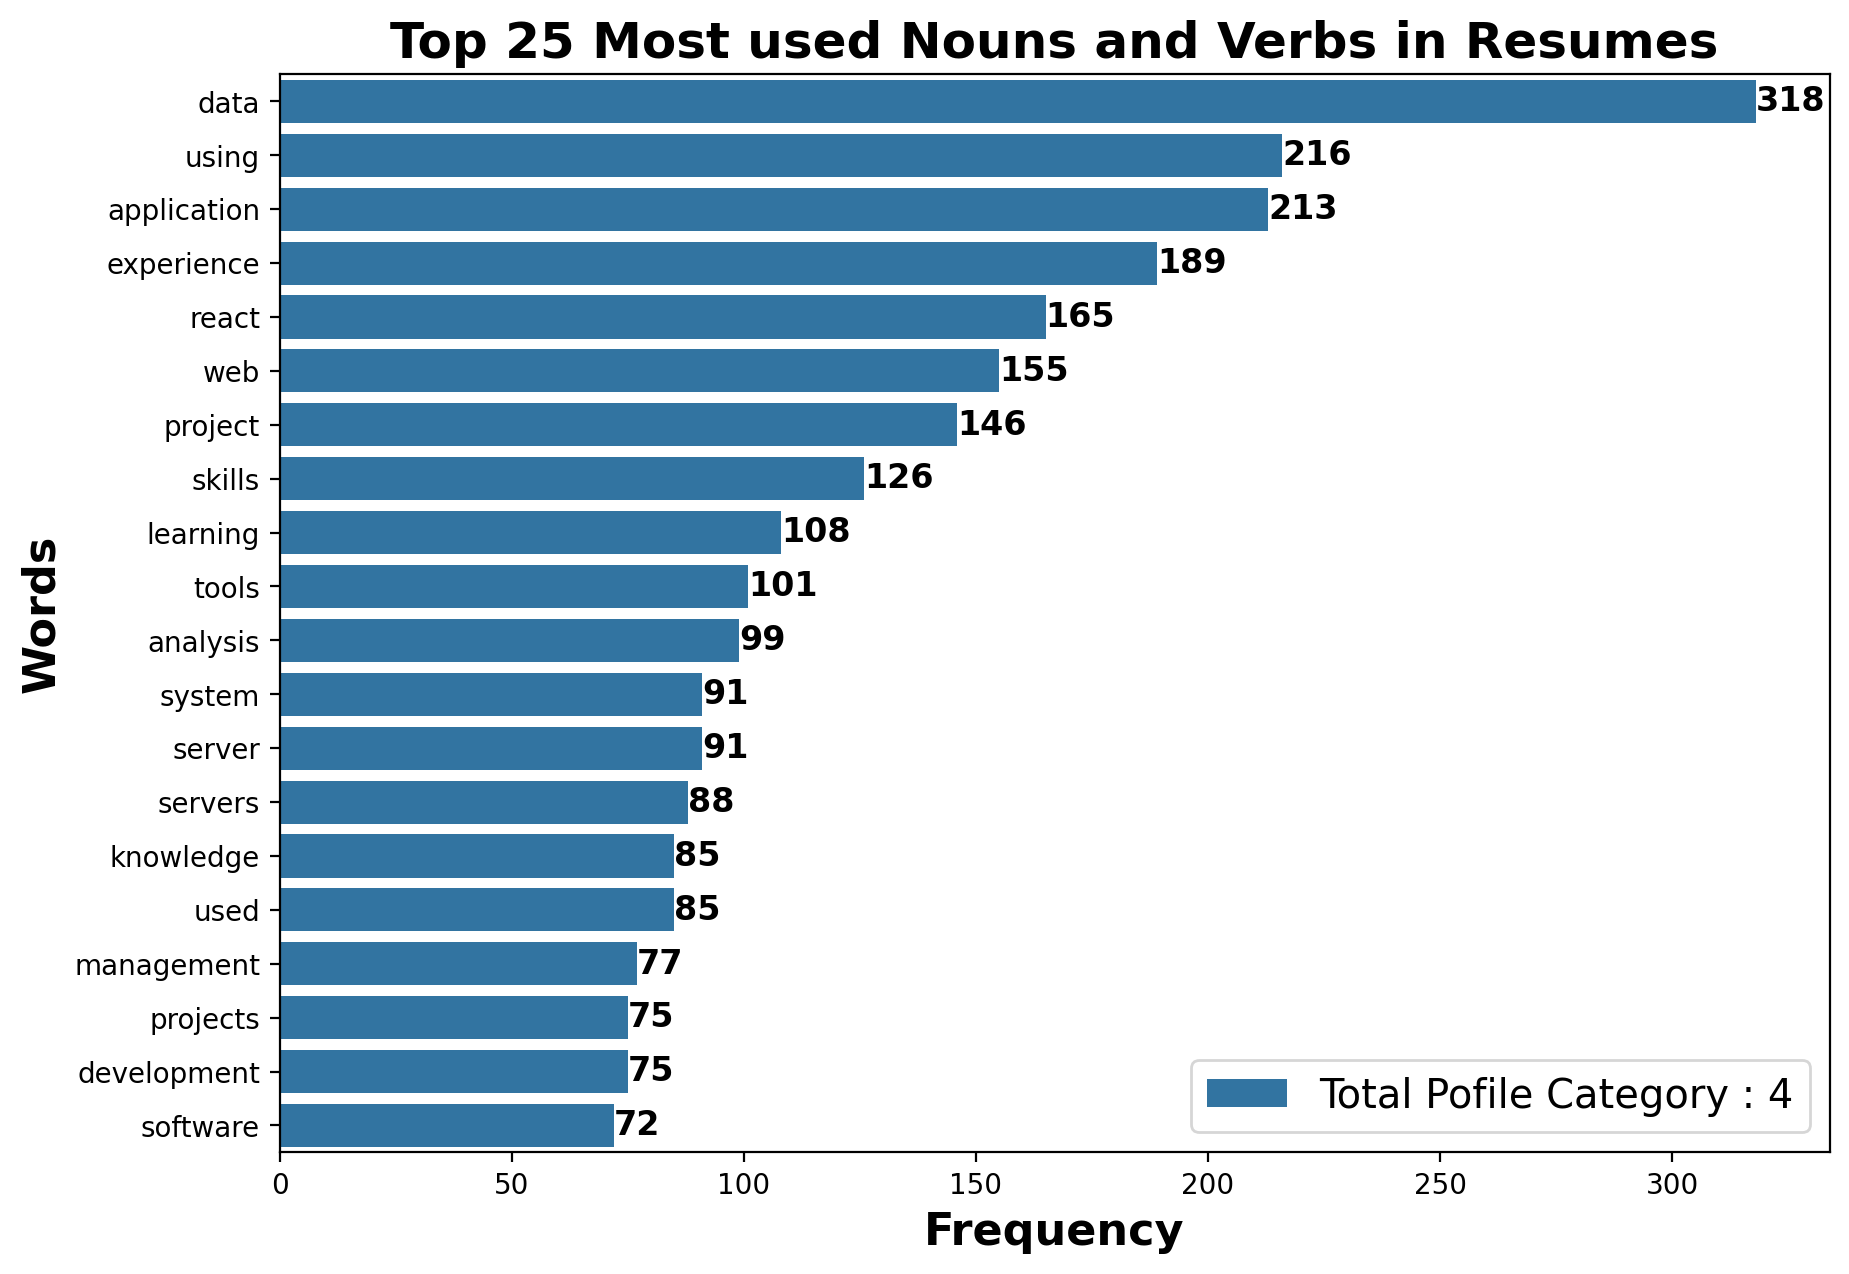

In [36]:
#visualizing the result of top 20 nouns and verbs 
fig, axe = plt.subplots(1,1, figsize=(10,7), dpi=200)
ax = sns.barplot(x= wd_df['Count'].head(20), y= wd_df.Words.head(20), data= wd_df, ax = axe,
            label= 'Total Pofile Category : {}'.format(len(resume_data.Category.unique())))

axe.set_xlabel('Frequency', size = 16,fontweight = 'bold')
axe.set_ylabel('Words', size=16, fontweight= 'bold')
plt.xticks(rotation = 0)
plt.legend(loc='best', fontsize= 'x-large')
plt.title('Top 25 Most used Nouns and Verbs in Resumes', fontsize = 18, fontweight= 'bold')
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

for i in ax.containers:
    ax.bar_label(i,color = 'black', fontweight = 'bold', fontsize = 12)

pylab.rcParams.update(rcParams)
plt.show()
fig.savefig('images/Top_Nouns_Verbs_Bar', dpi = 500)

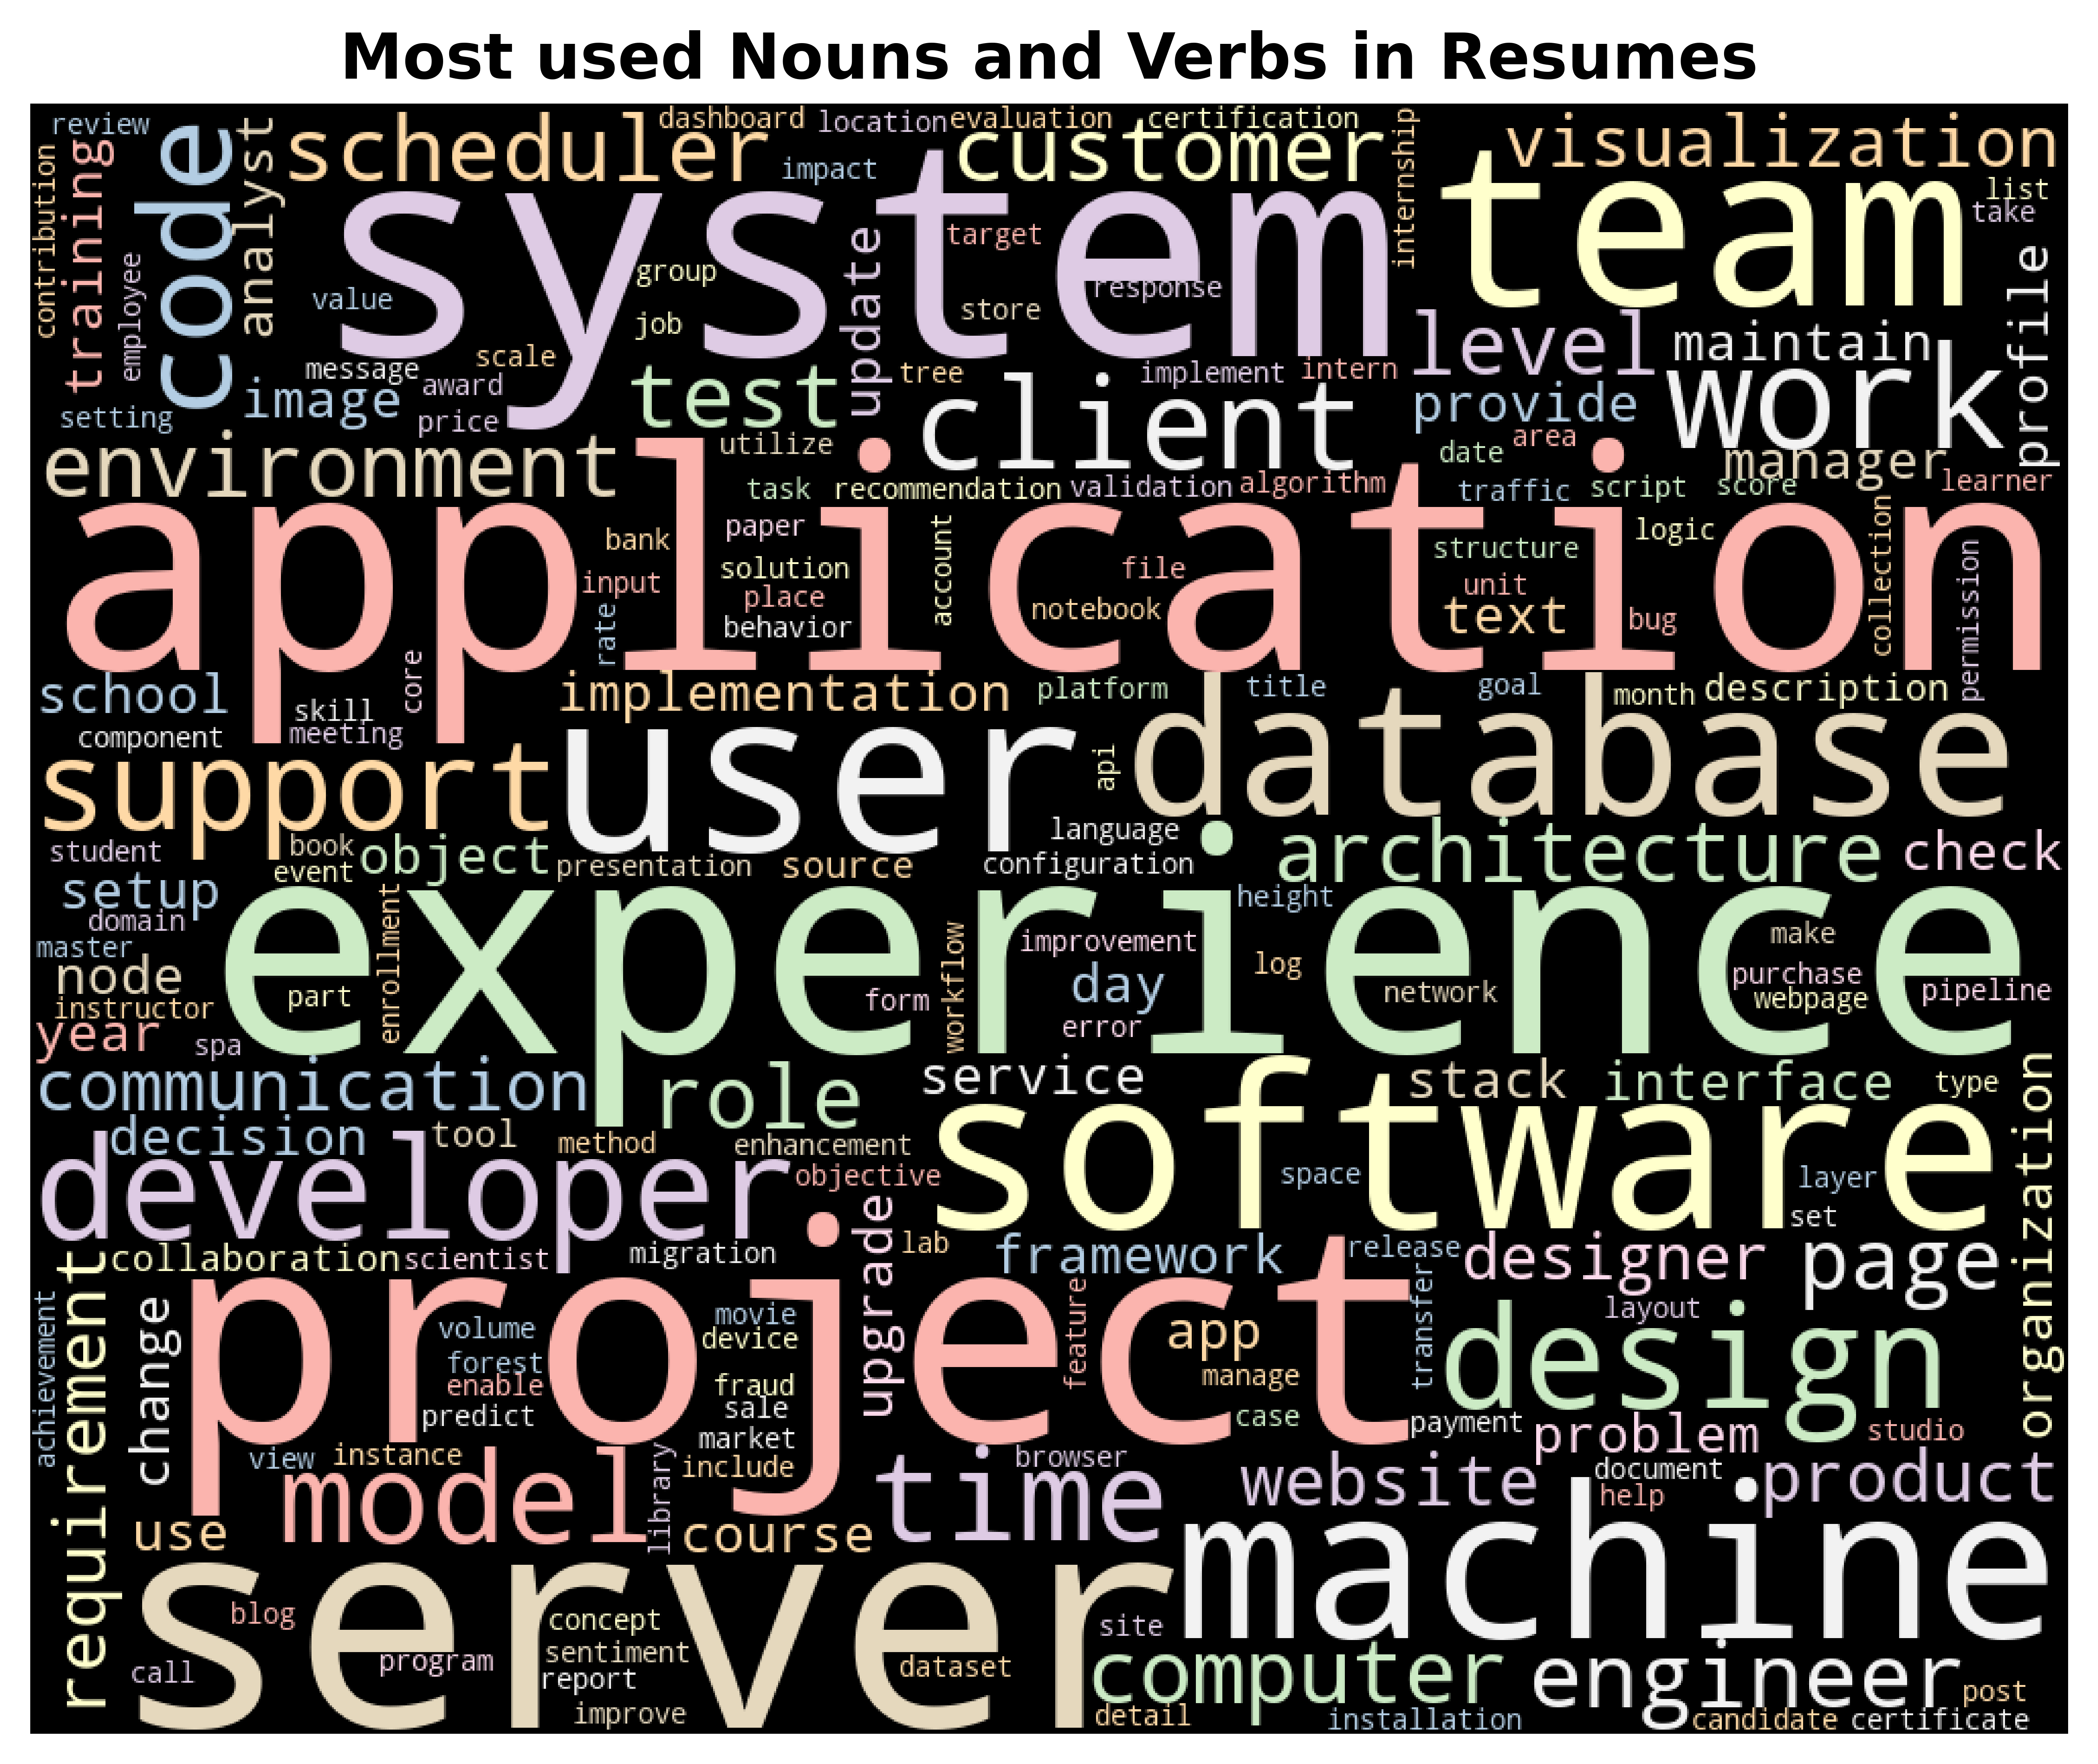

In [37]:
text = " ".join(cat for cat in wd_df.Words)

word_cloud = WordCloud(width=1000, height=800, random_state=10, background_color="black", 
                       colormap="Pastel1", collocations=False, stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(10,7), dpi=800)
plt.title('Most used Nouns and Verbs in Resumes', fontsize= 15, fontweight= 'bold')
plt.imshow(word_cloud)
plt.axis("off")

word_cloud.to_file('images/Word_Clouds_Noun_Verb.png')
plt.show()